In [2]:
! pip install xgboost
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
import scipy as sc
import seaborn as sns

ModuleNotFoundError: No module named 'xgboost'

## Data Cleaning 

In [ ]:
diabetes_df = pd.read_csv(Path('diabetes-dataset.csv'))
pimaData_df = pd.read_csv(Path('diabetes_PIMA_INDIANS.csv'))
# plt.hist(diabetes_df[''])
# diabetes_df
diabetes_df = pd.DataFrame(diabetes_df)
pimaData_df = pd.DataFrame(pimaData_df)
merged_diabetes_df = pd.concat([diabetes_df, pimaData_df])
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['BloodPressure'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['Glucose'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['BMI'] != 0]
merged_diabetes_df = merged_diabetes_df[merged_diabetes_df['SkinThickness'] != 0]


bp = merged_diabetes_df['BloodPressure']
glucose = merged_diabetes_df['Glucose']
bmi = merged_diabetes_df['BMI']
age = merged_diabetes_df['Age']
skin_thickness = merged_diabetes_df['SkinThickness']
dpf = merged_diabetes_df['DiabetesPedigreeFunction']

## GETTING RID OF OUTLIERS 
z_scores = sc.stats.zscore(merged_diabetes_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cleaned_merged_df = merged_diabetes_df[filtered_entries]

bp = cleaned_merged_df['BloodPressure']
glucose = cleaned_merged_df['Glucose']
bmi = cleaned_merged_df['BMI']
age = cleaned_merged_df['Age']
skin_thickness = cleaned_merged_df['SkinThickness']
dpf = cleaned_merged_df['DiabetesPedigreeFunction']

cleaned_merged_df['ln_pregnancies'] = np.log(cleaned_merged_df['Pregnancies'])
cleaned_merged_df['ln_glucose'] = np.log(glucose)
cleaned_merged_df['ln_bp'] = np.log(bp)
cleaned_merged_df['ln_skin'] = np.log(skin_thickness)
cleaned_merged_df['ln_insulin'] = np.log(cleaned_merged_df['Insulin'])
cleaned_merged_df['ln_bmi'] = np.log(bmi)
cleaned_merged_df['ln_dpf'] = np.log(dpf)
cleaned_merged_df['ln_age'] = np.log(cleaned_merged_df['Age'])


ln_cleaned_merged_df = cleaned_merged_df[['ln_pregnancies', 'ln_glucose', 'ln_bp', 'ln_skin', 'ln_insulin', 'ln_bmi', 'ln_dpf', 'ln_age', 'Outcome']]

ln_cleaned_merged_df = ln_cleaned_merged_df[~ln_cleaned_merged_df.isin([np.nan, np.inf, -np.inf]).any(1)]
ln_cleaned_merged_df = ln_cleaned_merged_df[ln_cleaned_merged_df['ln_pregnancies'] != 0]
normal_cleaned_merged_df = cleaned_merged_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-3-af1641ede8fe>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_merged_df['ln_pregnancies'] = np.log(cleaned_merged_df['Pregnancies'])
<ipython-input-3-af1641ede8fe>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_merged_df['ln_glucose'] = np.log(glucose)
<ipython-input-3-af1641ede8fe>:37: SettingWit

## Normal Data Glucose Box plot and Histogram 

In [ ]:
normal_cleaned_merged_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


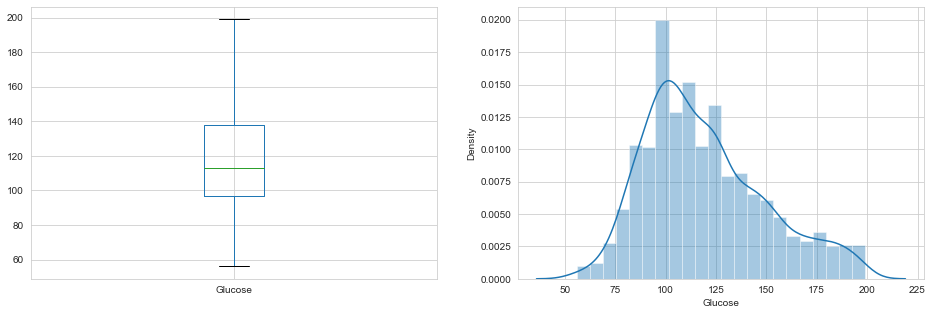

In [ ]:
## Visulizatons 
%matplotlib inline
sns.set_style('whitegrid')

plt.subplot(121), normal_cleaned_merged_df['Glucose'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(normal_cleaned_merged_df['Glucose'])
plt.show()



## ln_data Box Plot and Histogram of Glucose 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


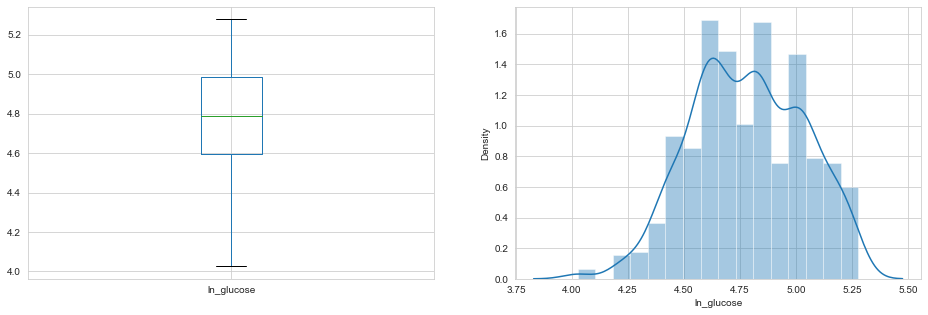

In [ ]:
plt.subplot(121), ln_cleaned_merged_df['ln_glucose'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_cleaned_merged_df['ln_glucose'])
plt.show()


## Normal Data Box Plot and Histogram for BMI

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


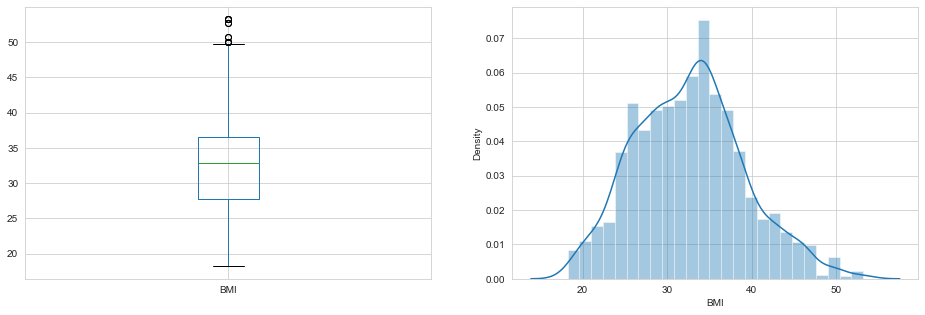

In [ ]:
plt.subplot(121), normal_cleaned_merged_df['BMI'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(normal_cleaned_merged_df['BMI'])
plt.show()

## ln_data Box Plot and Histogram for BMI

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


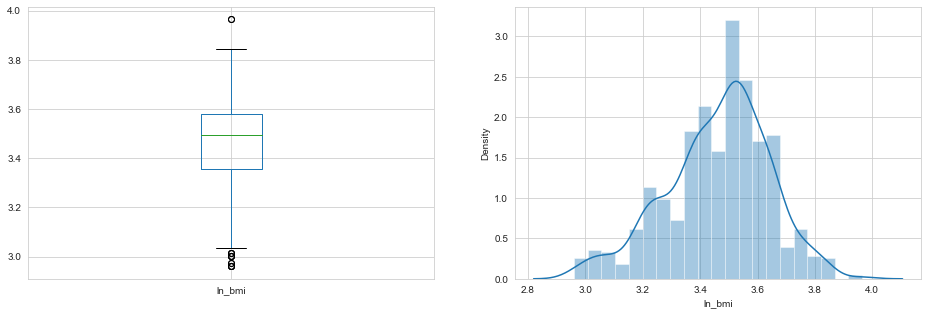

In [ ]:
plt.subplot(121), ln_cleaned_merged_df['ln_bmi'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_cleaned_merged_df['ln_bmi'])
plt.show()

## Normal Data Box plot and Histogram for Insulin 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


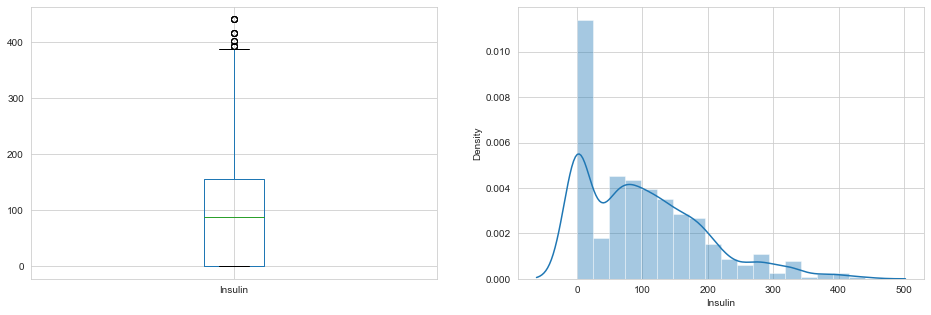

In [ ]:
plt.subplot(121), normal_cleaned_merged_df['Insulin'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(normal_cleaned_merged_df['Insulin'])
plt.show()

## ln_data Box Plot and Histogram Insulin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


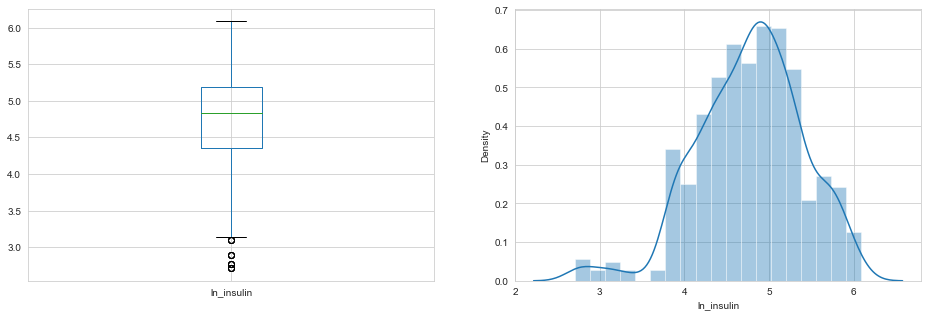

In [ ]:
plt.subplot(121), ln_cleaned_merged_df['ln_insulin'].plot.box(figsize=(16, 5))
plt.subplot(122), sns.distplot(ln_cleaned_merged_df['ln_insulin'])
plt.show()

## Natural log data heat map

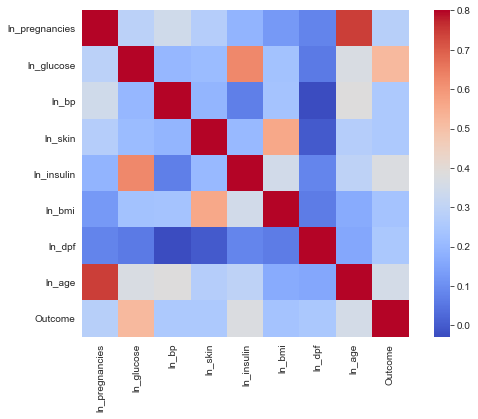

In [ ]:
matrix = normal_cleaned_merged_df.corr()
matrix_ln = ln_cleaned_merged_df.corr()
# ax = plt.subplots(figsize=(9,6)), sns.heatmap(matrix, vmax=.8, square=True, cmap='coolwarm')
ax_ln = plt.subplots(figsize=(9,6)), sns.heatmap(matrix_ln, vmax=.8, square=True, cmap='coolwarm')

## Normal Data heatmap

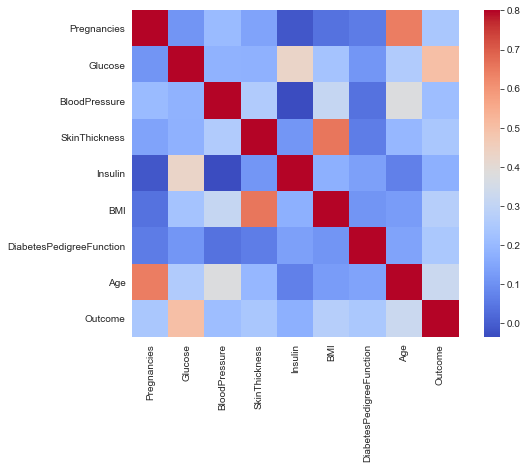

In [ ]:
ax = plt.subplots(figsize=(9,6)), sns.heatmap(matrix, vmax=.8, square=True, cmap='coolwarm')


## Random Forest Test Normal Data Accuracy Score, Confusion Matrix, Classisification Report, and Important Varible Visulization 

Accuracy Score =0.9741219963031423
[[366   7]
 [  7 161]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       373
           1       0.96      0.96      0.96       168

    accuracy                           0.97       541
   macro avg       0.97      0.97      0.97       541
weighted avg       0.97      0.97      0.97       541



<AxesSubplot:>

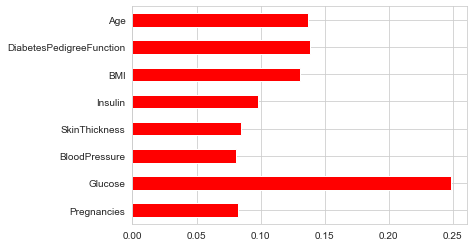

In [ ]:
X = normal_cleaned_merged_df.drop(columns= 'Outcome', axis=1)
y = normal_cleaned_merged_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

# Random Forest 


rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print(f'Accuracy Score ={format(metrics.accuracy_score(y_test, predictions))}')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

rfc.feature_importances_
importance_series = pd.Series(rfc.feature_importances_, index=X.columns)
importance_series.plot(kind='barh', color='red')

In [ ]:
input_data = [0, 135, 68, 42, 250, 42.3, 0.365, 24]

X_train_perdict = rfc.predict(X_train)
training_data_acc = accuracy_score(X_train_perdict , y_train)



def diabetes_function(input_data): 
    input_data_np_array = np.asarray(input_data)

    #reshape data
    input_data_reshape = input_data_np_array.reshape(1, -1)

    #standardize input data 
    std_data = scaler.transform(input_data_reshape)

    prediction = rfc.predict(std_data)

    if (prediction[0] == 0):
        print('You do not have diabetes!')
    else:
        print('You do have diabetes!')
        
diabetes_function(input_data)

You do not have diabetes!


## Random Forest Test ln_data Accuracy Score, Confusion Matrix, Classisification Report, and Important Varible Visulization 

Accuracy Score =0.9629629629629629
[[161   7]
 [  2  73]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       168
           1       0.91      0.97      0.94        75

    accuracy                           0.96       243
   macro avg       0.95      0.97      0.96       243
weighted avg       0.96      0.96      0.96       243



<AxesSubplot:>

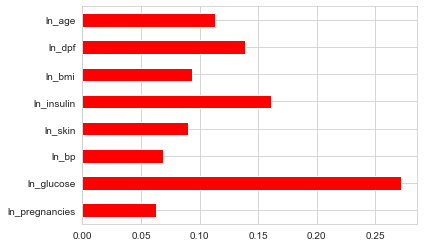

In [ ]:
X = ln_cleaned_merged_df.drop(columns= 'Outcome', axis=1)
y = ln_cleaned_merged_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

# Random Forest 


rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print(f'Accuracy Score ={format(metrics.accuracy_score(y_test, predictions))}')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

rfc.feature_importances_
importance_series = pd.Series(rfc.feature_importances_, index=X.columns)
importance_series.plot(kind='barh', color='red')

### important to note that for the ln data set the second most important varible is insulin while in the normal dataset the second most important varible is the Diabetes Pedigree Function 

## Decision Tree


In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
print(f'The Accuracy Scroe ={format(metrics.accuracy_score(y_test, predictions))}')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

The Accuracy Scroe =0.9506172839506173
[[157  11]
 [  1  74]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       168
           1       0.87      0.99      0.93        75

    accuracy                           0.95       243
   macro avg       0.93      0.96      0.94       243
weighted avg       0.96      0.95      0.95       243



## XGBoost 


In [ ]:

xgb = XGBClassifier(gamma=0)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
print(f'The Accuracy Score ={format(metrics.accuracy_score(y_test, predictions))}')
print(confusion_matrix(y_test, xgb_predicted))
print(classification_report(y_test, xgb_predicted))

[20:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Accuracy Score =0.9506172839506173
[[160   8]
 [  2  73]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       168
           1       0.90      0.97      0.94        75

    accuracy                           0.96       243
   macro avg       0.94      0.96      0.95       243
weighted avg       0.96      0.96      0.96       243



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## SVM

In [ ]:
# SVM 

svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
print(f'Accuracy Score ={format(metrics.accuracy_score(y_test, svc_predict))}')
print(confusion_matrix(y_test, svc_predict))
print(classification_report(y_test, svc_predict))




Accuracy Score =0.7777777777777778
[[146  22]
 [ 32  43]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       168
           1       0.66      0.57      0.61        75

    accuracy                           0.78       243
   macro avg       0.74      0.72      0.73       243
weighted avg       0.77      0.78      0.77       243



In [ ]:
## ln_values
ln_cleaned_merged_df.groupby('Outcome').mean()
X = ln_cleaned_merged_df.drop(columns= 'Outcome', axis=1)
y = ln_cleaned_merged_df['Outcome']

scaler = StandardScaler()
scaler.fit(X)

standardized_data = scaler.transform(X)

X = standardized_data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

print(f'The shape of our standardized data is: {X.shape}, The shape of our trained data is: {X_train.shape}, The shape of our test data is: {X_test.shape}')

classifier = svm.SVC(kernel= 'linear')

classifier.fit(X_train, y_train)
X_train_perdict = classifier.predict(X_train)
training_data_acc = accuracy_score(X_train_perdict , y_train)

print(f'Our training data is {training_data_acc*100}% accurate')

The shape of our standardized data is: (809, 8), The shape of our trained data is: (647, 8), The shape of our test data is: (162, 8)
Our training data is 81.2982998454405% accurate


In [ ]:
input_data = [1.609438, 4.795791, 4.276666, 3.135494, 4.718499, 3.265759, -1.406497, 3.401197]

def diabetes_function(input_data): 
    input_data_np_array = np.asarray(input_data)

    #reshape data
    input_data_reshape = input_data_np_array.reshape(1, -1)

    #standardize input data 
    std_data = scaler.transform(input_data_reshape)

    print(std_data)

    prediction = classifier.predict(std_data)
    print(prediction)

    if (prediction[0] == 0):
        print('You do not have diabetes!')
    else:
        print('You do have diabetes!')
        
diabetes_function(input_data)

[[ 0.39684752  0.05477141  0.18404601 -0.3926829  -0.08969112 -1.09204535
  -0.8998358  -0.18855646]]
[0]
You do not have diabetes!


In [ ]:
## Normal Values

normal_cleaned_merged_df.groupby('Outcome').mean()
X = normal_cleaned_merged_df.drop(columns= 'Outcome', axis=1)
y = normal_cleaned_merged_df['Outcome']

scaler = StandardScaler()
scaler.fit(X)

standardized_data = scaler.transform(X)

X = standardized_data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

print(f'The shape of our standardized data is: {X.shape}, The shape of our trained data is: {X_train.shape}, The shape of our test data is: {X_test.shape}')

classifier = svm.SVC(kernel= 'linear')

classifier.fit(X_train, y_train)
X_train_perdict = classifier.predict(X_train)
training_data_acc = accuracy_score(X_train_perdict , y_train)

print(f'Our training data is {training_data_acc*100}% accurate')

The shape of our standardized data is: (1801, 8), The shape of our trained data is: (1440, 8), The shape of our test data is: (361, 8)
Our training data is 80.625% accurate


In [ ]:
normal_cleaned_merged_df.mean()


Pregnancies                   3.370350
Glucose                     119.195447
BloodPressure                71.461410
SkinThickness                28.750694
Insulin                     101.365908
BMI                          32.640255
DiabetesPedigreeFunction      0.480250
Age                          31.132149
Outcome                       0.306496
dtype: float64

## The Perdictive system


In [ ]:
# Randomly selected data for 0 outcome (no diabetes)
pregnancies = int(input('How many times have you been pregnant? '))
glucose = int(input('Enter an input for Glucose: '))
blood_pressure = int(input('Enter an input for Blood Presure: '))
skin_thickness = int(input('Enter an input for skin thickness: '))
insulin = int(input('Enter an input for Insulin: '))
bmi = float(input('Enter your BMI: '))
dpf = float(input('Enter your DPF: '))
age = int(input('Enter your age: '))
input_data = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age)


def diabetes_function(input_data): 
    input_data_np_array = np.asarray(input_data)

    #reshape data
    input_data_reshape = input_data_np_array.reshape(1, -1)

    #standardize input data 
    std_data = scaler.transform(input_data_reshape)

    print(std_data)

    prediction = classifier.predict(std_data)
    print(prediction)

    if (prediction[0] == 0):
        print('You do not have diabetes!')
    else:
        print('You do have diabetes!')
        
diabetes_function(input_data)



ValueError: invalid literal for int() with base 10: ''

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
X = cleaned_merged_df[['BloodPressure', 'Glucose', 'BMI', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']]
y = cleaned_merged_df['Outcome']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)
# fact_df = merged_diabetes_df.drop('Outcome', axis = 1)
# outcome_df = merged_diabetes_df.Outcome

# X = fact_df
# y = outcome_df
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

# train1 = classifier.score(X_train, y_train)
# test1 = classifier.score(X_test, y_test)

# print(f'training score = {train1}')
# print(f'testing score = {test1}')
# Y = 4.127134*(0.14690869) + 4.927254*(0.78777203) + 3.514526*(0.25026754) + 3.555348*(0.08121834) - 2.063568*(0.10741898)
# print(Y)


[0.00120017 0.0062259  0.0064053  0.00284563 0.25693349 0.00749543]


In [ ]:
factors_df = diabetes_df.drop('Outcome', axis = 1)
#Ind_df = pd.get_dummies(Independent_df)
factors_df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [ ]:
diab_out_df = diabetes_df.Outcome
diab_out_df.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [ ]:
# Split into train and test data:
X = factors_df
y = diab_out_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier2 = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.7926666666666666
Logistic Regression Testing Data Score: 0.734


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train, y_train)
print(f'Random Forest Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {clf.score(X_test, y_test)}')

Random Forest Training Score: 1.0
Random Forest Testing Score: 0.974


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifier2.fit(X_train_scaled, y_train)
print(f"Logistic Regression Scaled Training Data Score: {classifier2.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Scaled Testing Data Score: {classifier2.score(X_test_scaled, y_test)}")

Logistic Regression Scaled Training Data Score: 0.7913333333333333
Logistic Regression Scaled Testing Data Score: 0.736


In [ ]:
clf2 = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Random Forest Scaled Training Score: {clf2.score(X_train_scaled, y_train)}')
print(f'Random Forest Scaled Testing Score: {clf2.score(X_test_scaled, y_test)}')

Random Forest Scaled Training Score: 1.0
Random Forest Scaled Testing Score: 0.974


###  No Difference between scaled and unscaled data!